In [1]:
#import math
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model

# Display preferences.
%matplotlib inline
pd.options.display.max_rows = 16
import warnings
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd")
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv',index_col=0)

### Applying log transformation to Newspaper

In [3]:
data.Newspaper = np.log(data.Newspaper)

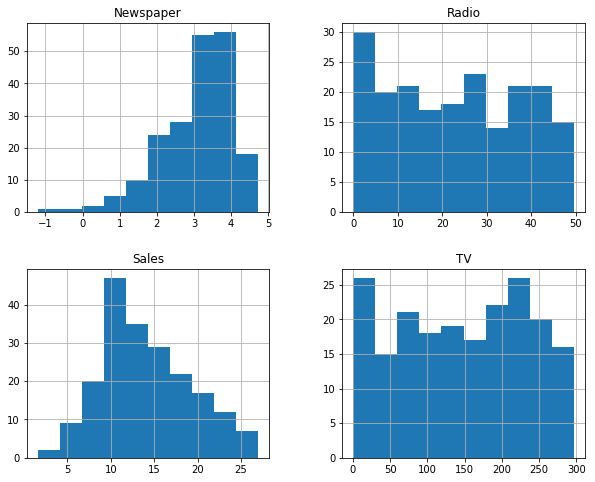

In [4]:
data.hist(figsize = (10,8))
plt.show()

In [5]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1, 1)
X = data[['TV','Radio','Newspaper']]
regr.fit(X, Y)

predicted = regr.predict(X).ravel()
actual = data['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

print('average residual =', np.abs(residual).mean())

average residual = 1.2561253730565503


In [6]:
data['residual'] = residual
data.sort_values(by=['residual'])

,TV,Radio,Newspaper,Sales,residual
131,0.7,39.6,2.163323,1.6,-8.753009
6,8.7,48.9,4.317488,7.2,-5.345662
179,276.7,2.3,3.165475,11.8,-4.229350
36,290.7,4.1,2.140066,12.8,-4.167203
127,7.8,38.9,3.923952,6.6,-4.015252
26,262.9,3.5,2.970414,12.0,-3.615272
79,5.4,29.9,2.240710,5.3,-3.453361
76,16.9,43.7,4.493121,8.7,-3.253223
...,...,...,...,...,...
128,80.2,0.0,2.219203,8.8,2.228361


# Filtering outliers from Radio and TV:

In [7]:
data_quant = data[(data.TV < data.TV.quantile(0.75)) & (data.TV > data.TV.quantile(0.25))]
data_quant = data_quant[(data_quant.Radio < data_quant.Radio.quantile(0.75)) & (data_quant.Radio > data_quant.Radio.quantile(0.25))]

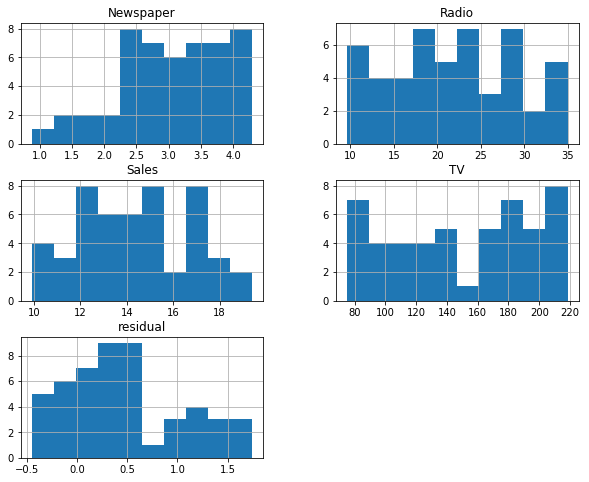

In [8]:
data_quant.hist(figsize = (10,8))
plt.show()

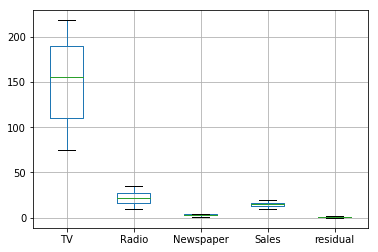

In [9]:
data_quant.boxplot()
plt.show()

In [10]:
data_quant.shape

(50, 5)

In [11]:
data_quant.iloc[:,:3].corr()

,TV,Radio,Newspaper
TV,1.000000,0.251585,0.081472
Radio,0.251585,1.000000,0.245562
Newspaper,0.081472,0.245562,1.000000


In [12]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data_quant['Sales'].values.reshape(-1, 1)
X = data_quant[['TV','Radio','Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[ 0.03856767  0.16670488 -0.01461917]]

Intercept: 
 [ 4.97331115]

R-squared:
0.972046776541


#### (The R-squared value is too close to 1...)

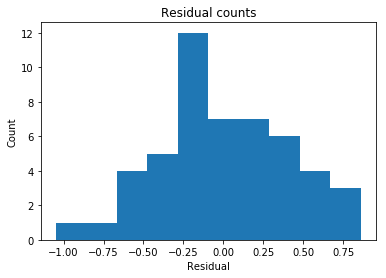

In [13]:
predicted = regr.predict(X).ravel()
actual = data_quant['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

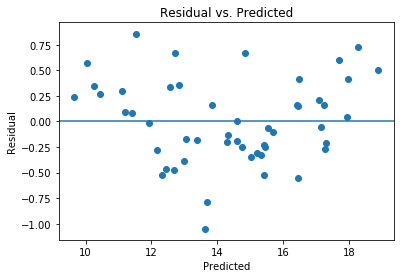

In [14]:
# Not a great precision...

plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [15]:
print('average residual =', np.abs(residual).mean())

average residual = 0.3343363312433158
